# Multi Class Classification

Here is the implementation of a multi class classification using logisitc regression. 

In [616]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

data = pd.read_csv("./datasets/iris.csv")
print(data.head())
print()
print(data.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%  

The difference between the binary classification and multiclass classification can be seen in how we treat the `data['Species']` column. In the binary classification it was just a `1` or `0` indicating if it belonged to the species or not. Here it is a list of 3 numbers with each number in the list being probability of the item belonging to the respective species.

In [617]:
species = data["Species"].unique()
# print(species)   ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

conv = lambda x: np.array([i==x for i in species], dtype=int)
data["Species"] = data["Species"].apply(conv)
print(data["Species"][0].shape)   

(3,)


## Functions for prediction and gradient descent

Lifted and moodified from: https://towardsdatascience.com/ml-from-scratch-multinomial-logistic-regression-6dda9cbacf9d

### Prediction

Here we have a more complex weight matrix. The weight matrix is now not just how much each independant variable affects the classification, but a set of such vectors, one for each potential class. It will essentially spit out a vector with relative likelihoods of the flower belonging to each species.

This is followed by softmax, which essentially converts the relative likelihoods into probabilities (as the sum adds up to one) and also pushes larger values higher and vice versa. It is a very common classification layer.

### Loss Function

For multi class classification, Cross Entropy is a very commonly used loss function. Very crudely, it checks how off the probabilites of each class differ from the true (which is usually a n elemnt 0 array with just one element being 1). It then looks at the relative error and allocates loss.

### Updating Weights

The `dW` and `dB` conditions are found by doing the corresponding gradients and for these common prediction functions, these are easily found.

### Side Note:
I have used weights and biases here but it is possible to stick to the previous codes style and just add a 1 column to the features(`X`). There is no particular reason i chose to do them seperately here.

In [618]:
def linearPredict(X, W,B):
    logitScores = np.dot(X, W) + B
    return logitScores

def softmax(logitMatrix):
    prob = np.exp(logitMatrix) / np.sum(np.exp(logitMatrix), axis=1)[:, None]
    pred = np.argmax(prob, axis=1)
    return prob, pred


def crossEntropyLoss(probabilities, target):
    return -np.sum(target * np.log(probabilities)) / target.shape[0]

def gradient_descent(prob,target, X, W, B):
    gradW = np.dot(X.T, (prob - target)) / target.shape[0]
    gradB = np.sum(prob - target) / target.shape[0]
    return gradW, gradB

def update_weights(W, B, gradW, gradB, learning_rate):
    W = W - learning_rate * gradW
    B = B - learning_rate * gradB
    return W, B


In [619]:
# Normalize the data except the target
def normalize(X):
    for feature in X.columns:
        mean = X[feature].mean()
        std = X[feature].std()
        X.loc[:, feature] = (X[feature] - mean) / std

    return X


# Split the data into training and test sets
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

X = train_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
X = normalize(X)
y = train_data["Species"]
y = np.array([i for i in y])

print(X.shape, y.shape)

W = np.random.rand(X.shape[1], y[0].shape[0])
B = np.random.rand(y[0].shape[0])

(120, 4) (120, 3)


Iteration 0 - Loss: 2.0768335637044215
Accuracy: 0.225
Iteration 2000 - Loss: 0.9354817321370875
Accuracy: 0.6666666666666666
Iteration 4000 - Loss: 0.6280411295385052
Accuracy: 0.75
Iteration 6000 - Loss: 0.5097760520000533
Accuracy: 0.8666666666666667
Iteration 8000 - Loss: 0.452013844102443
Accuracy: 0.875
Iteration 10000 - Loss: 0.41824475149687373
Accuracy: 0.9
Iteration 12000 - Loss: 0.39591085319803604
Accuracy: 0.9
Iteration 14000 - Loss: 0.3798247782658428
Accuracy: 0.9083333333333333
Iteration 16000 - Loss: 0.3675134279423607
Accuracy: 0.9083333333333333
Iteration 18000 - Loss: 0.35766439045826187
Accuracy: 0.9


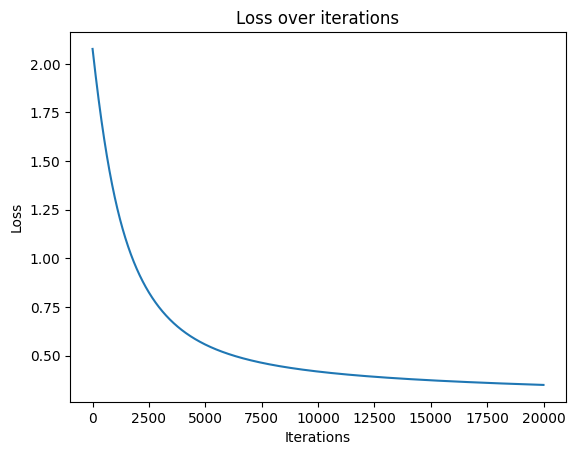

In [620]:
learning_rate = 0.0005
iters = 20000
history = {"loss": []}

for i in range(iters):
    logitScores = linearPredict(X, W, B)
    probabilities, predictions = softmax(logitScores)
    loss = crossEntropyLoss(probabilities, y)
    gradW, gradB = gradient_descent(probabilities, y, X, W, B)
    W, B = update_weights(W, B, gradW, gradB, learning_rate)
    history["loss"].append(loss)

    if i % (iters // 10) == 0:
        print(f"Iteration {i} - Loss: {loss}")
        print(f"Accuracy: {np.mean(predictions == np.argmax(y, axis=1))}")

plt.plot(history["loss"])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over iterations")
plt.show()

In [621]:
# Test the model
X_test = test_data[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
X_test = normalize(X_test)
y_test = test_data["Species"]
y_test = np.array([i for i in y_test])

logitScores = linearPredict(X_test, W, B)
probabilities, predictions = softmax(logitScores)
loss = crossEntropyLoss(probabilities, y_test)
print("Test loss:", loss)
print("Test accuracy:", np.mean(predictions == np.argmax(y_test, axis=1)))

Test loss: 0.28783451761070505
Test accuracy: 0.9333333333333333
